In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans


In [6]:
df = pd.read_csv("7Social_Network_Ads.csv")
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [7]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [8]:

df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])   # Male = 1, Female = 0
print("\n✅ Label Encoding Done!")


✅ Label Encoding Done!


In [10]:
print("\nDataset Info After Preprocessing:")
print(df.info())



Dataset Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB
None


In [11]:
X = df[['EstimatedSalary']]


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n✅ Data Scaling Done!")



✅ Data Scaling Done!


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

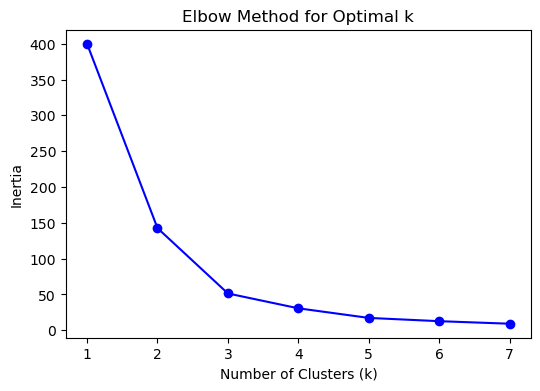

In [13]:
inertia = []
K = range(1, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\n✅ K-Means Clustering Applied Successfully!")
print(df[['User ID', 'EstimatedSalary', 'Cluster']].head())


✅ K-Means Clustering Applied Successfully!
    User ID  EstimatedSalary  Cluster
0  15624510            19000        1
1  15810944            20000        1
2  15668575            43000        1
3  15603246            57000        0
4  15804002            76000        0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
print("\nAverage EstimatedSalary per Cluster:")
print(df.groupby('Cluster')['EstimatedSalary'].mean())



Average EstimatedSalary per Cluster:
Cluster
0     73730.158730
1     34226.277372
2    125310.810811
Name: EstimatedSalary, dtype: float64


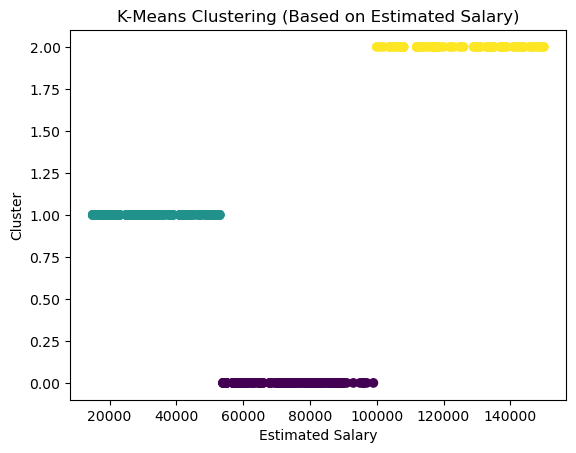

In [16]:
plt.scatter(df['EstimatedSalary'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Estimated Salary')
plt.ylabel('Cluster')
plt.title('K-Means Clustering (Based on Estimated Salary)')
plt.show()
